In [3]:
import numpy as np
import matplotlib.pyplot as plt

import pickle

import os
import sys
sys.path.append("../")

from utils.data import binary_LDS
from IBP_gibbs import IndianBuffetProcessGibbs

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
X, weights = binary_LDS(num_samples=100, noise_scale=0.2, binary_prob=0.5)

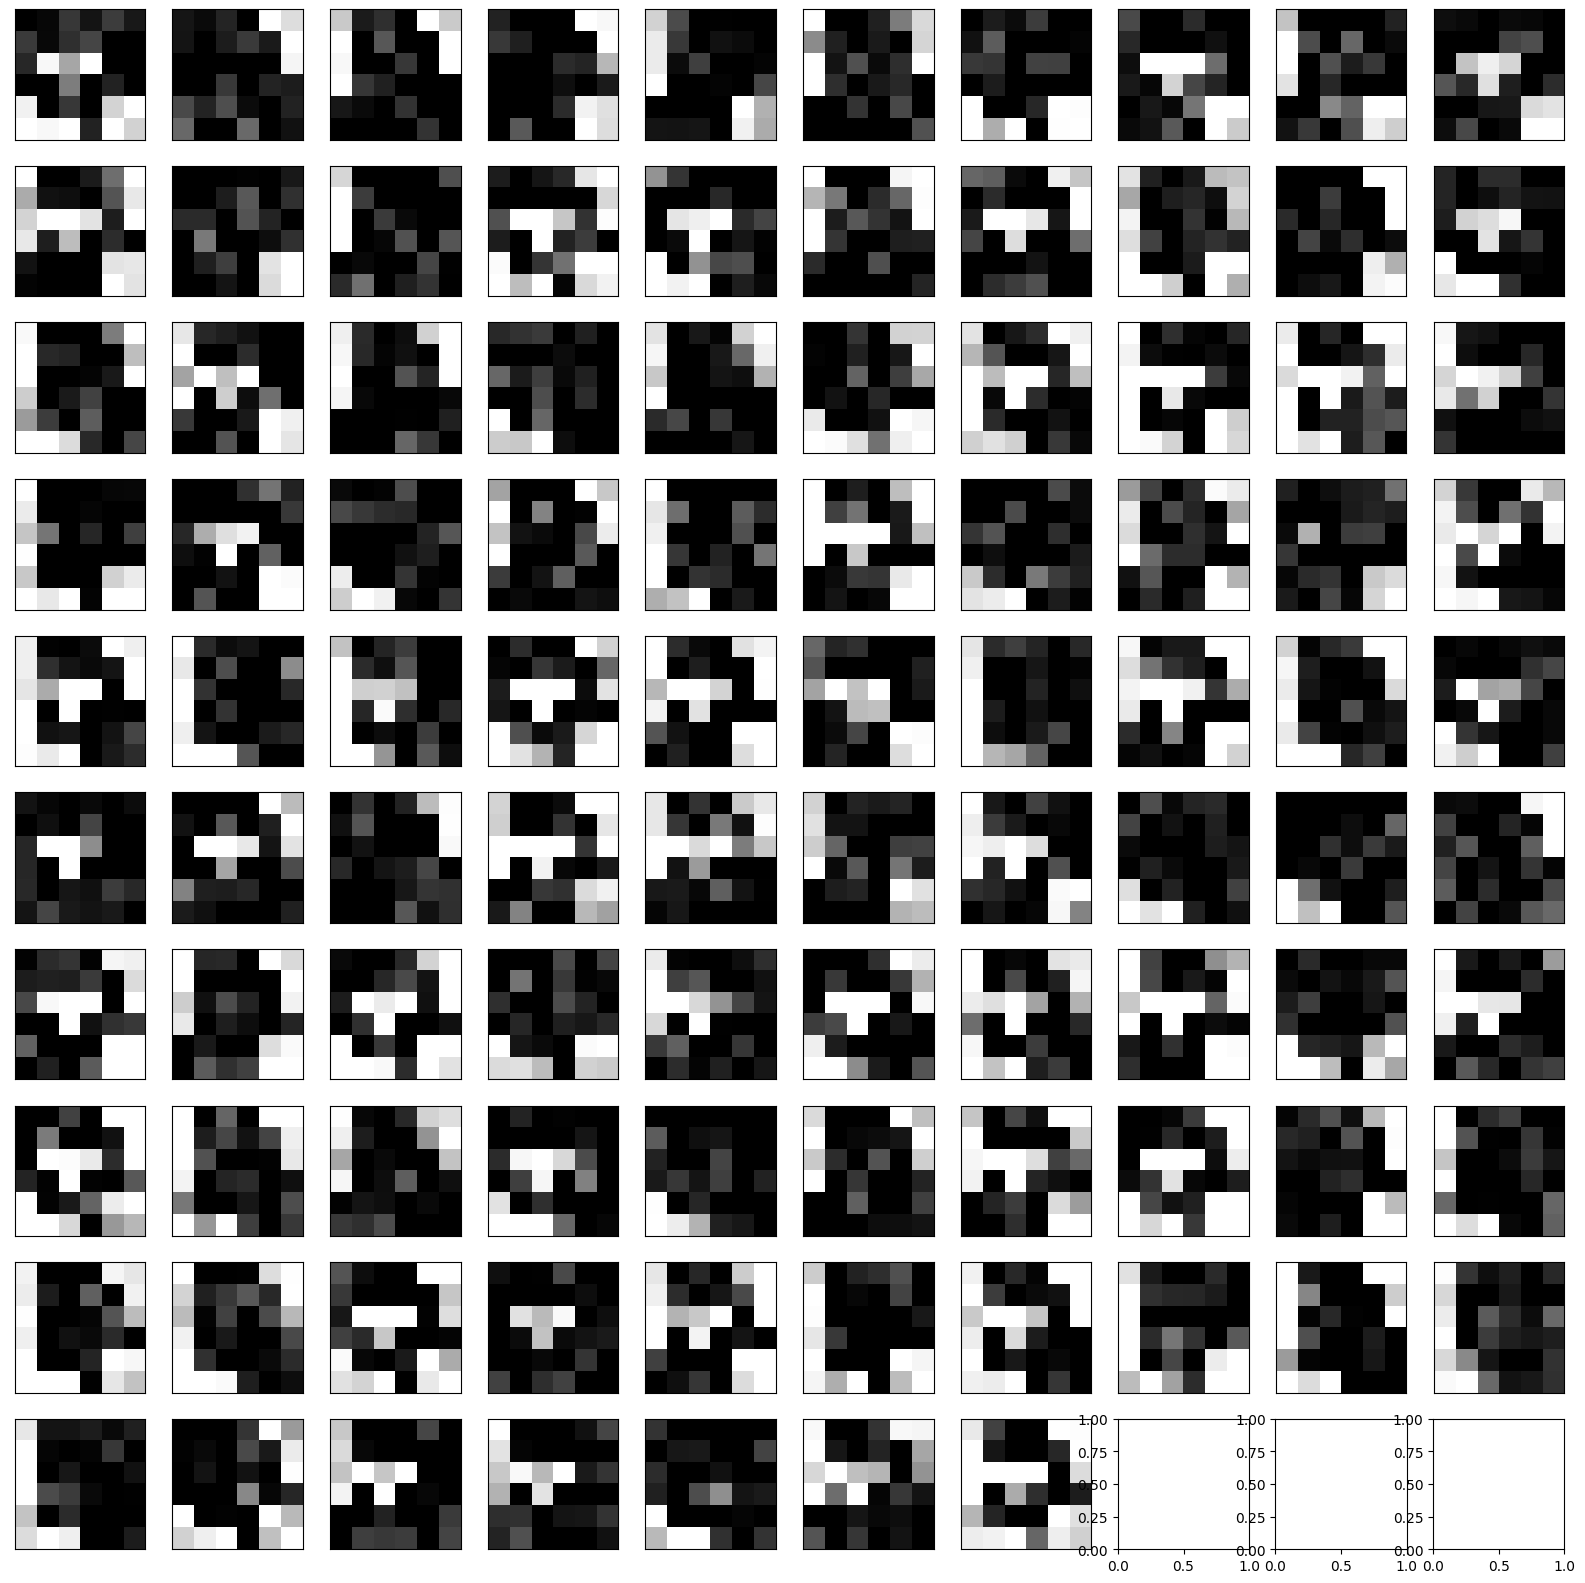

In [5]:
fig, ax = plt.subplots(10, 10, figsize=(20, 20))

for i in range(len(X)):
    ax[i // 10, i % 10].imshow(X[i].reshape(6, 6), cmap="gray", vmin=0.0, vmax=1.0)
    ax[i // 10, i % 10].set_xticks([])
    ax[i // 10, i % 10].set_yticks([])

In [7]:
prior_params = {
    "init_alpha": 1.0, 
    "prior_alpha_a": 1.0,
    "prior_alpha_b": 1.0,
    "init_sigma_x": 1.0, 
    "prior_sigma_x_a": 1.0, 
    "prior_sigma_x_b": 1.0, 
    "init_sigma_A": 1.0, 
    "prior_sigma_A_a": 1.0, 
    "prior_sigma_A_b": 1.0, 
}

ibp = IndianBuffetProcessGibbs(X, num_iters=1000, prior_params=prior_params)

In [8]:
history = ibp.gibbs_sampling()

Current K = 11: 100%|██████████| 1000/1000 [04:54<00:00,  3.40it/s]


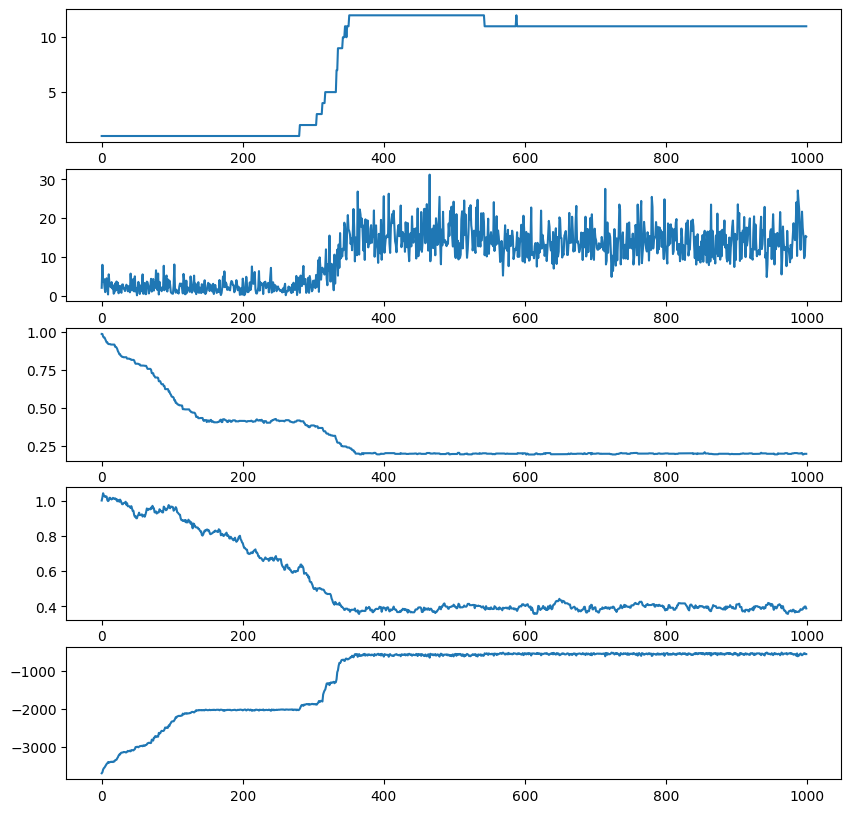

In [13]:
fig, ax = plt.subplots(5, 1, figsize=(10, 10))
ax[0].plot(history["K"])
ax[1].plot(history["alpha"])
ax[2].plot(history["sigma_x"])
ax[3].plot(history["sigma_A"])
ax[4].plot(history["log_p_X_Z"])

In [10]:
A_posterior = ibp.posterior_mean_A()

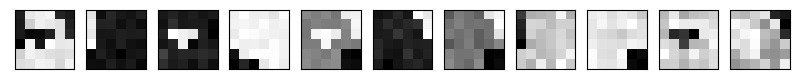

In [11]:
fig, ax = plt.subplots(1,len(A_posterior),figsize = (10,2))
for i in range(len(A_posterior)):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].imshow((1-A_posterior[i]).reshape(6,6), 'gray') # , vmin=0, vmax=1)